# Proto Seguro Safe Driver Prediction
### Pujan Malavia

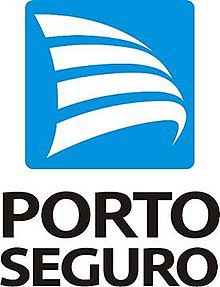

In [3]:
from IPython.display import display
from PIL import Image
path= "C:/Users/puj83/OneDrive/Portfolio/Porto_Seguro_Claims/ps_logo.jpg"
display(Image.open(path))

### Link to Dataset:
https://www.kaggle.com/c/porto-seguro-safe-driver-prediction/data

### Abstract:
Nothing ruins the thrill of buying a brand new car more quickly than seeing your new insurance bill. The sting’s even more painful when you know you’re a good driver. It doesn’t seem fair that you have to pay so much if you’ve been cautious on the road for years. Porto Seguro, one of Brazil’s largest auto and homeowner insurance companies, completely agrees. Inaccuracies in car insurance company’s claim predictions raise the cost of insurance for good drivers and reduce the price for bad ones. In this competition, you’re challenged to build a model that predicts the probability that a driver will initiate an auto insurance claim in the next year. While Porto Seguro has used machine learning for the past 20 years, they’re looking to Kaggle’s machine learning community to explore new, more powerful methods. A more accurate prediction will allow them to further tailor their prices, and hopefully make auto insurance coverage more accessible to more drivers.

### Industry:
Insurance

### Company Information:
Porto Seguro is the third largest Brazilian insurance company in Brazil, was founded in 1945 and has more than 13,000 employees. The company operates through its subsidiaries in Brazil and in Uruguay. It is headquartered in São Paulo.

The company offers car insurance, residential, health, life, business, consortium also offers auto and homeowners, pension, savings bonds and other financial services. Porto Seguro competes with Bradesco Seguros, BB Seguridade, SulAmérica, Mapfre, Zurich Insurance Group and others insurance and reinsurance companies in Brazil.

Porto Seguro is the leader on the auto and homeowner insurance segments in Brazil and has around 10 million clients all over the different business lines.

Currently the company its owned by the Brazilian billionaire Jayme Garfinkel and the bank Itaú Unibanco, through PSIUPAR (Porto Seguro Itaú Unibanco Participações S.A.). "Since establishing an alliance with the bank Itaú in August 2009, Porto Seguro products have been available at the bank’s branches."

https://en.wikipedia.org/wiki/Porto_Seguro_S.A.

### Use Case:
Predict if a driver will file an insurance claim next year.

### Tool:
Python (Jupyter Notebook)

### Initial Dataset(s):
train.csv contains the training data, where each row corresponds to a policy holder, and the target columns signifies that a claim was filed.

test.csv contains the test data.

sample_submission.csv is submission file showing the correct format.

### Data:
    
In this competition, you will predict the probability that an auto insurance policy holder files a claim.
In the train and test data, features that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix bin to indicate binary features and cat to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation. The target columns signifies whether or not a claim was filed for that policy holder.

### Data Fields:

id

target

ps_ind_01

ps_ind_02_cat

ps_ind_03

ps_ind_04_cat

ps_ind_05_cat

ps_ind_06_bin

ps_ind_07_bin

ps_ind_08_bin

ps_ind_09_bin

ps_ind_10_bin

ps_ind_11_bin

ps_ind_12_bin

ps_ind_13_bin

ps_ind_14

ps_ind_15

ps_ind_16_bin

ps_ind_17_bin

ps_ind_18_bin

ps_reg_01 - ps_reg_03

ps_car_01_cat - ps_car_11_cat

ps_car_11 - ps_car_15

ps_calc_01 - ps_calc_14

ps_calc_15_bin - ps_calc_20_bin  

### Import Libaries:

In [12]:
%matplotlib inline
import pandas as pd # Dataframe manipulation
import numpy as np 
import matplotlib.pyplot as plt # Base plotting
import seaborn as sns # Sophisticated plotting (?)
import warnings
# Ignore all warnings - users beware
warnings.filterwarnings("ignore")

### Import Dataset(s):

In [13]:
# Read dataframe into Jupyter
df_train = pd.read_csv('C:/Users/puj83/OneDrive/Portfolio/Porto_Seguro_Claims/train.csv')
df_test = pd.read_csv('C:/Users/puj83/OneDrive/Portfolio/Porto_Seguro_Claims/test.csv')

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
id                595212 non-null int64
target            595212 non-null int64
ps_ind_01         595212 non-null int64
ps_ind_02_cat     595212 non-null int64
ps_ind_03         595212 non-null int64
ps_ind_04_cat     595212 non-null int64
ps_ind_05_cat     595212 non-null int64
ps_ind_06_bin     595212 non-null int64
ps_ind_07_bin     595212 non-null int64
ps_ind_08_bin     595212 non-null int64
ps_ind_09_bin     595212 non-null int64
ps_ind_10_bin     595212 non-null int64
ps_ind_11_bin     595212 non-null int64
ps_ind_12_bin     595212 non-null int64
ps_ind_13_bin     595212 non-null int64
ps_ind_14         595212 non-null int64
ps_ind_15         595212 non-null int64
ps_ind_16_bin     595212 non-null int64
ps_ind_17_bin     595212 non-null int64
ps_ind_18_bin     595212 non-null int64
ps_reg_01         595212 non-null float64
ps_reg_02         595212 non-null float64
ps_re

In [15]:
# Combine the training and test dataset
df = pd.concat([df_train, df_test])

In [16]:
df.set_index('id', inplace = True)
df.head(5)

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,...,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,target
id,,,,,,,,,,,,,,,,,,,,,
7,0.6,0.5,0.2,3,1,10,1,10,1,5,...,0,0,11,0,1,0,0.7,0.2,0.718070,0.0
9,0.3,0.1,0.3,2,1,9,5,8,1,7,...,0,0,3,0,0,1,0.8,0.4,0.766078,0.0
13,0.5,0.7,0.1,2,2,9,1,8,2,7,...,0,0,12,1,0,0,0.0,0.0,-1.000000,0.0
16,0.6,0.9,0.1,2,4,7,1,8,4,2,...,0,0,8,1,0,0,0.9,0.2,0.580948,0.0
17,0.4,0.6,0.0,2,2,6,3,10,2,12,...,0,0,9,1,0,0,0.7,0.6,0.840759,0.0


In [17]:
print (df.shape)
print (df_train.shape)
print (df_test.shape)

(1488028, 58)
(595212, 59)
(892816, 58)


In [18]:
df.describe()

,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,...,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,target
count,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,...,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,1.488028e+06,595212.000000
mean,4.496817e-01,4.501073e-01,4.499718e-01,2.371666e+00,1.885551e+00,7.688461e+00,3.008052e+00,9.225874e+00,2.338736e+00,8.439336e+00,...,1.002669e-03,1.241038e-02,7.298086e+00,6.606838e-01,1.206718e-01,1.543620e-01,6.110305e-01,4.395943e-01,5.514848e-01,0.036448
std,2.872071e-01,2.871817e-01,2.872136e-01,1.117059e+00,1.136029e+00,1.333837e+00,1.414919e+00,1.460205e+00,1.247940e+00,2.905658e+00,...,3.164909e-02,1.273684e-01,3.543585e+00,4.734774e-01,3.257456e-01,3.612955e-01,2.876763e-01,4.045123e-01,7.938159e-01,0.187401
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000
25%,2.000000e-01,2.000000e-01,2.000000e-01,2.000000e+00,1.000000e+00,7.000000e+00,2.000000e+00,8.000000e+00,1.000000e+00,6.000000e+00,...,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e-01,2.000000e-01,5.250000e-01,0.000000
50%,4.000000e-01,5.000000e-01,5.000000e-01,2.000000e+00,2.000000e+00,8.000000e+00,3.000000e+00,9.000000e+00,2.000000e+00,8.000000e+00,...,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,7.000000e-01,3.000000e-01,7.211103e-01,0.000000
75%,7.000000e-01,7.000000e-01,7.000000e-01,3.000000e+00,3.000000e+00,9.000000e+00,4.000000e+00,1.000000e+01,3.000000e+00,1.000000e+01,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+00,0.000000e+00,0.000000e+00,9.000000e-01,6.000000e-01,1.001561e+00,0.000000
max,9.000000e-01,9.000000e-01,9.000000e-01,5.000000e+00,6.000000e+00,1.000000e+01,9.000000e+00,1.200000e+01,7.000000e+00,2.500000e+01,...,1.000000e+00,4.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.000000e-01,1.800000e+00,4.423517e+00,1.000000


In [19]:
(pd.DataFrame(np.sum(df.apply(lambda x: x == -1))
              /len(df))[0][pd.DataFrame(np.sum(df.apply(lambda x: x == -1))/len(df))[0] != 0])

ps_car_01_cat    1.794321e-04
ps_car_02_cat    6.720304e-06
ps_car_03_cat    6.909426e-01
ps_car_05_cat    4.481838e-01
ps_car_07_cat    1.936792e-02
ps_car_09_cat    9.717559e-04
ps_car_11        4.032182e-06
ps_car_12        6.720304e-07
ps_car_14        7.152083e-02
ps_ind_02_cat    3.514719e-04
ps_ind_04_cat    1.532229e-04
ps_ind_05_cat    9.757209e-03
ps_reg_03        1.810826e-01
Name: 0, dtype: float64

In [20]:
np.sum(pd.isnull(df))

ps_calc_01             0
ps_calc_02             0
ps_calc_03             0
ps_calc_04             0
ps_calc_05             0
ps_calc_06             0
ps_calc_07             0
ps_calc_08             0
ps_calc_09             0
ps_calc_10             0
ps_calc_11             0
ps_calc_12             0
ps_calc_13             0
ps_calc_14             0
ps_calc_15_bin         0
ps_calc_16_bin         0
ps_calc_17_bin         0
ps_calc_18_bin         0
ps_calc_19_bin         0
ps_calc_20_bin         0
ps_car_01_cat          0
ps_car_02_cat          0
ps_car_03_cat          0
ps_car_04_cat          0
ps_car_05_cat          0
ps_car_06_cat          0
ps_car_07_cat          0
ps_car_08_cat          0
ps_car_09_cat          0
ps_car_10_cat          0
ps_car_11              0
ps_car_11_cat          0
ps_car_12              0
ps_car_13              0
ps_car_14              0
ps_car_15              0
ps_ind_01              0
ps_ind_02_cat          0
ps_ind_03              0
ps_ind_04_cat          0


In [21]:
categorical_features = df.columns[df.columns.str.endswith('cat')].tolist()
binary_features = df.columns[df.columns.str.endswith('bin')].tolist()
numeric_features = [feature for feature in df.columns.tolist()
                    if feature not in categorical_features and feature not in binary_features]

In [22]:
binary_numeric = binary_features + numeric_features

In [23]:
df[categorical_features].apply(set)

ps_car_01_cat           {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, -1}
ps_car_02_cat                                           {0, 1, -1}
ps_car_03_cat                                           {0, 1, -1}
ps_car_04_cat                       {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
ps_car_05_cat                                           {0, 1, -1}
ps_car_06_cat    {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
ps_car_07_cat                                           {0, 1, -1}
ps_car_08_cat                                               {0, 1}
ps_car_09_cat                                  {0, 1, 2, 3, 4, -1}
ps_car_10_cat                                            {0, 1, 2}
ps_car_11_cat    {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
ps_ind_02_cat                                     {1, 2, 3, 4, -1}
ps_ind_04_cat                                           {0, 1, -1}
ps_ind_05_cat                            {0, 1, 2, 3, 4, 5, 6, -1}
dtype: object

In [24]:
for feature in ['ps_car_02_cat', 'ps_car_03_cat', 'ps_car_05_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_ind_04_cat']:
    binary_numeric.append(feature)
    binary_features.append(feature)
    categorical_features.remove(feature)

In [25]:
categorical_features

['ps_car_01_cat',
 'ps_car_04_cat',
 'ps_car_06_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_ind_02_cat',
 'ps_ind_05_cat']

In [26]:
df[df == -1] = np.nan

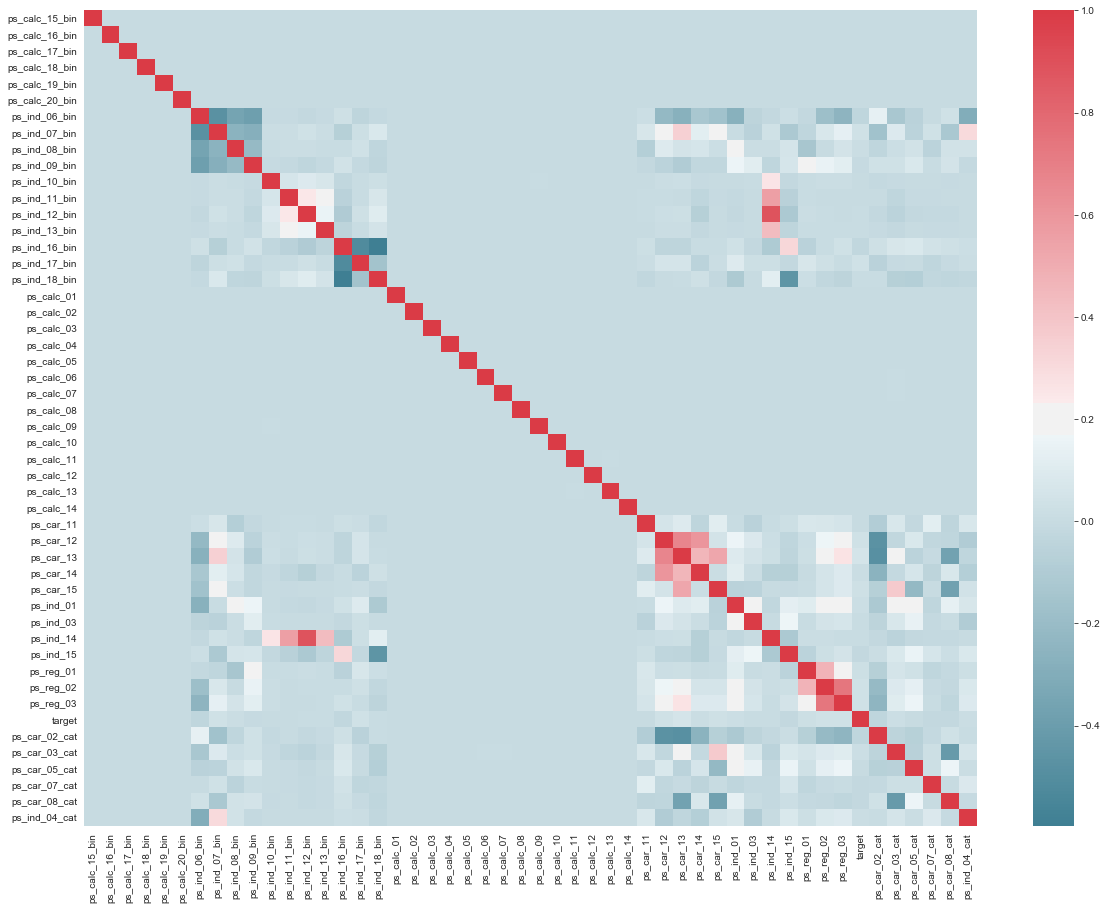

In [27]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20,15))

sns.heatmap(df[binary_numeric].corr(), cmap=cmap)

plt.show()

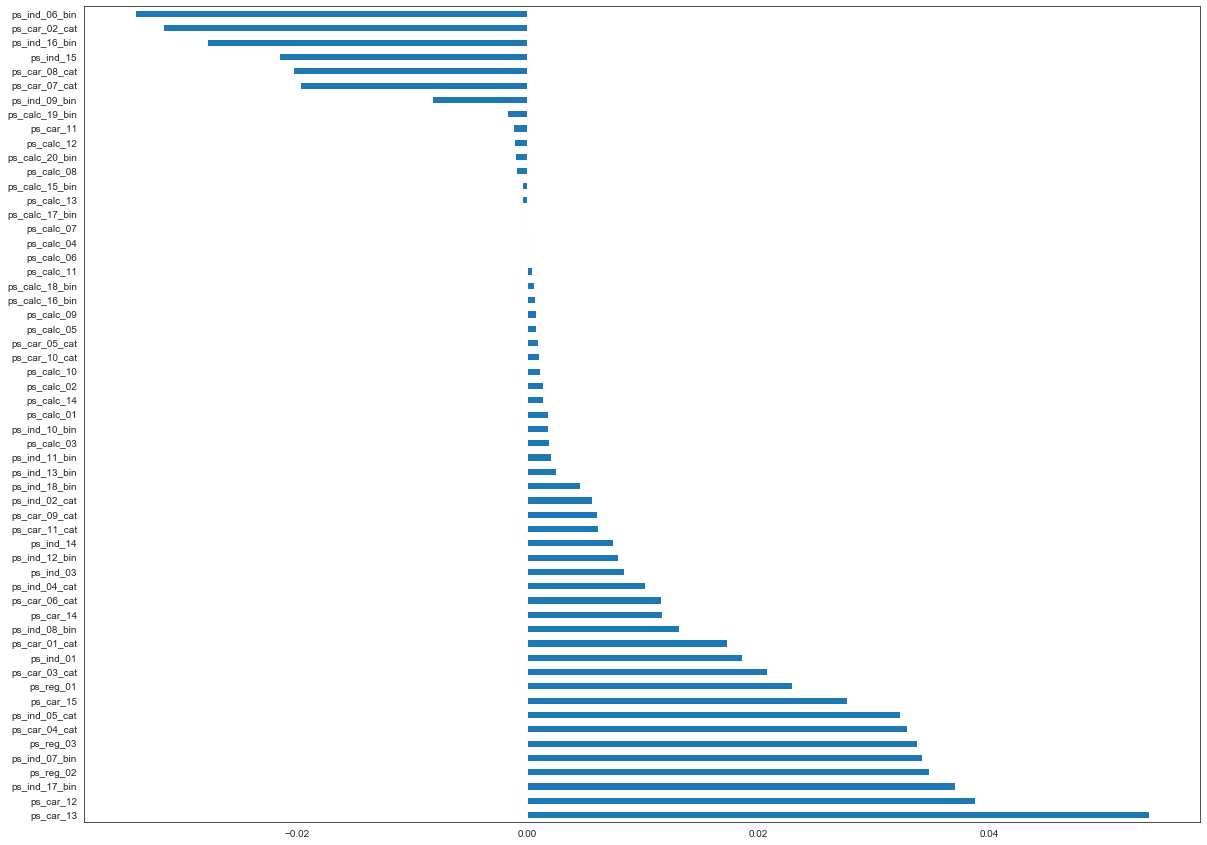

In [28]:
plt.figure(figsize=(20, 15))
(df.corr()
     .target
     .drop('target')
     .sort_values(ascending=False)
     .plot
     .barh())

In [29]:
len(numeric_features)

27

In [30]:
len(binary_features)

23

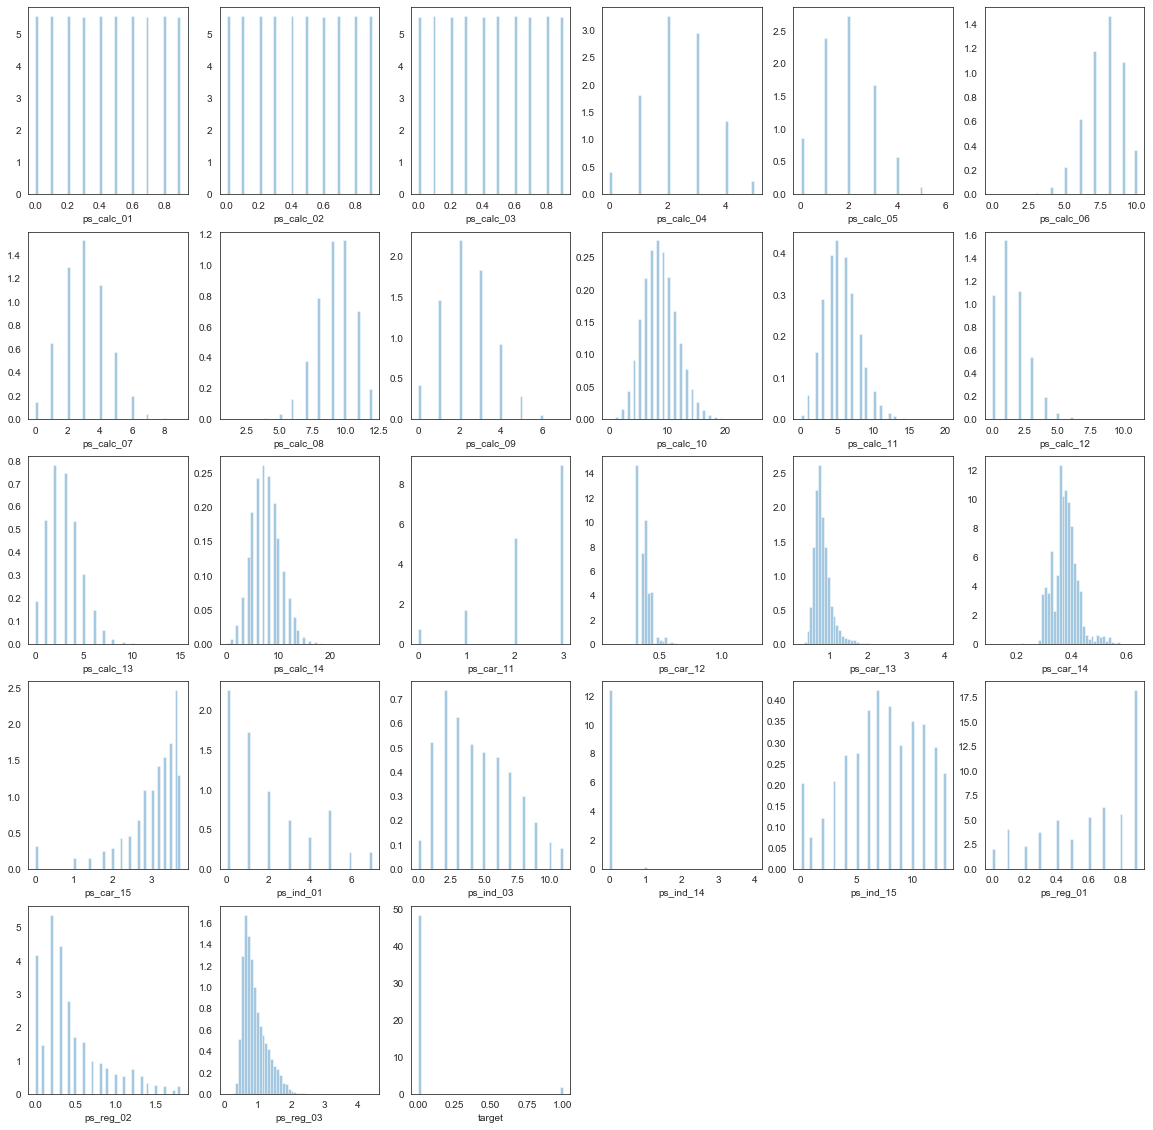

In [31]:
plt.figure(figsize=(20,20))
for idx, num_feat in enumerate(numeric_features):
    plt.subplot(5, 6, idx+1)
    sns.distplot(df[num_feat].dropna(), kde = False, norm_hist=True)

plt.show()

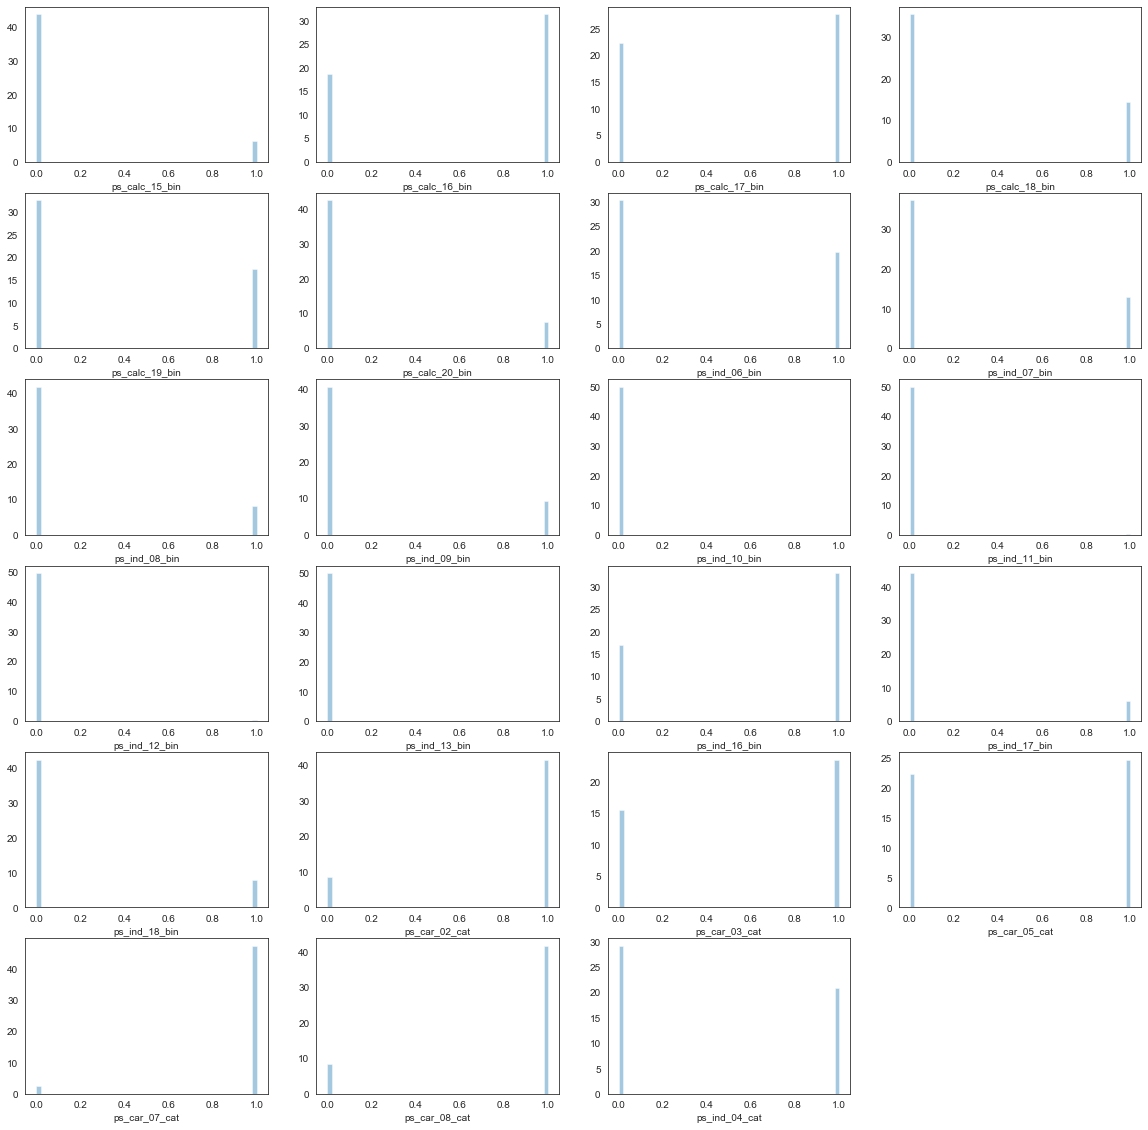

In [32]:
plt.figure(figsize=(20,20))
for idx, bin_feat in enumerate(binary_features):
    plt.subplot(6, 4, idx+1)
    sns.distplot(df[bin_feat].dropna(), kde = False, norm_hist=True)

plt.show()

In [33]:
len(categorical_features)

8

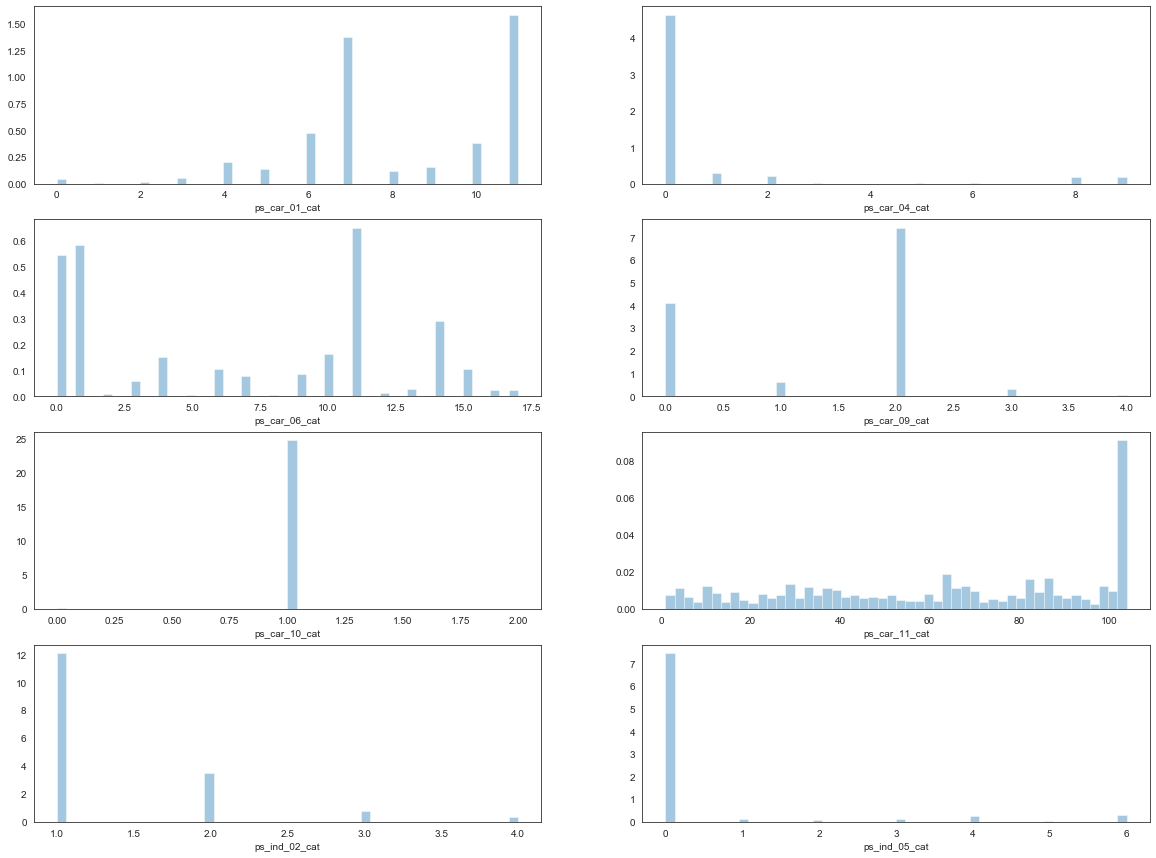

In [34]:
plt.figure(figsize=(20,15))

for idx, cat_feat in enumerate(categorical_features):
    plt.subplot(4, 2, idx+1)
    sns.distplot(df[cat_feat].dropna(), kde=False, norm_hist=True)
    
plt.show()

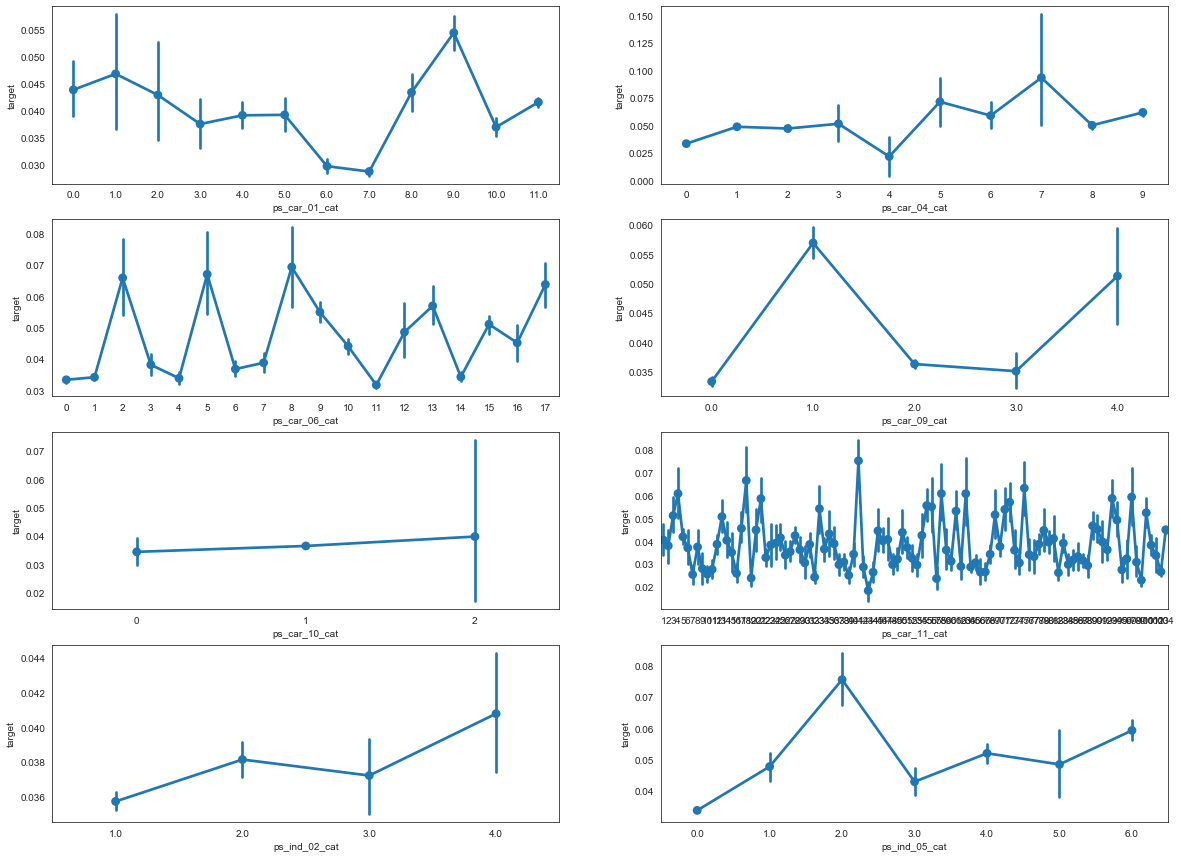

In [35]:
plt.figure(figsize=(20,15))

for idx, cat_feat in enumerate(categorical_features):
     plt.subplot(4, 2, idx+1)
     sns.pointplot(x=cat_feat, y='target', data=df.iloc[:df_train.shape[0]])
    
plt.show()

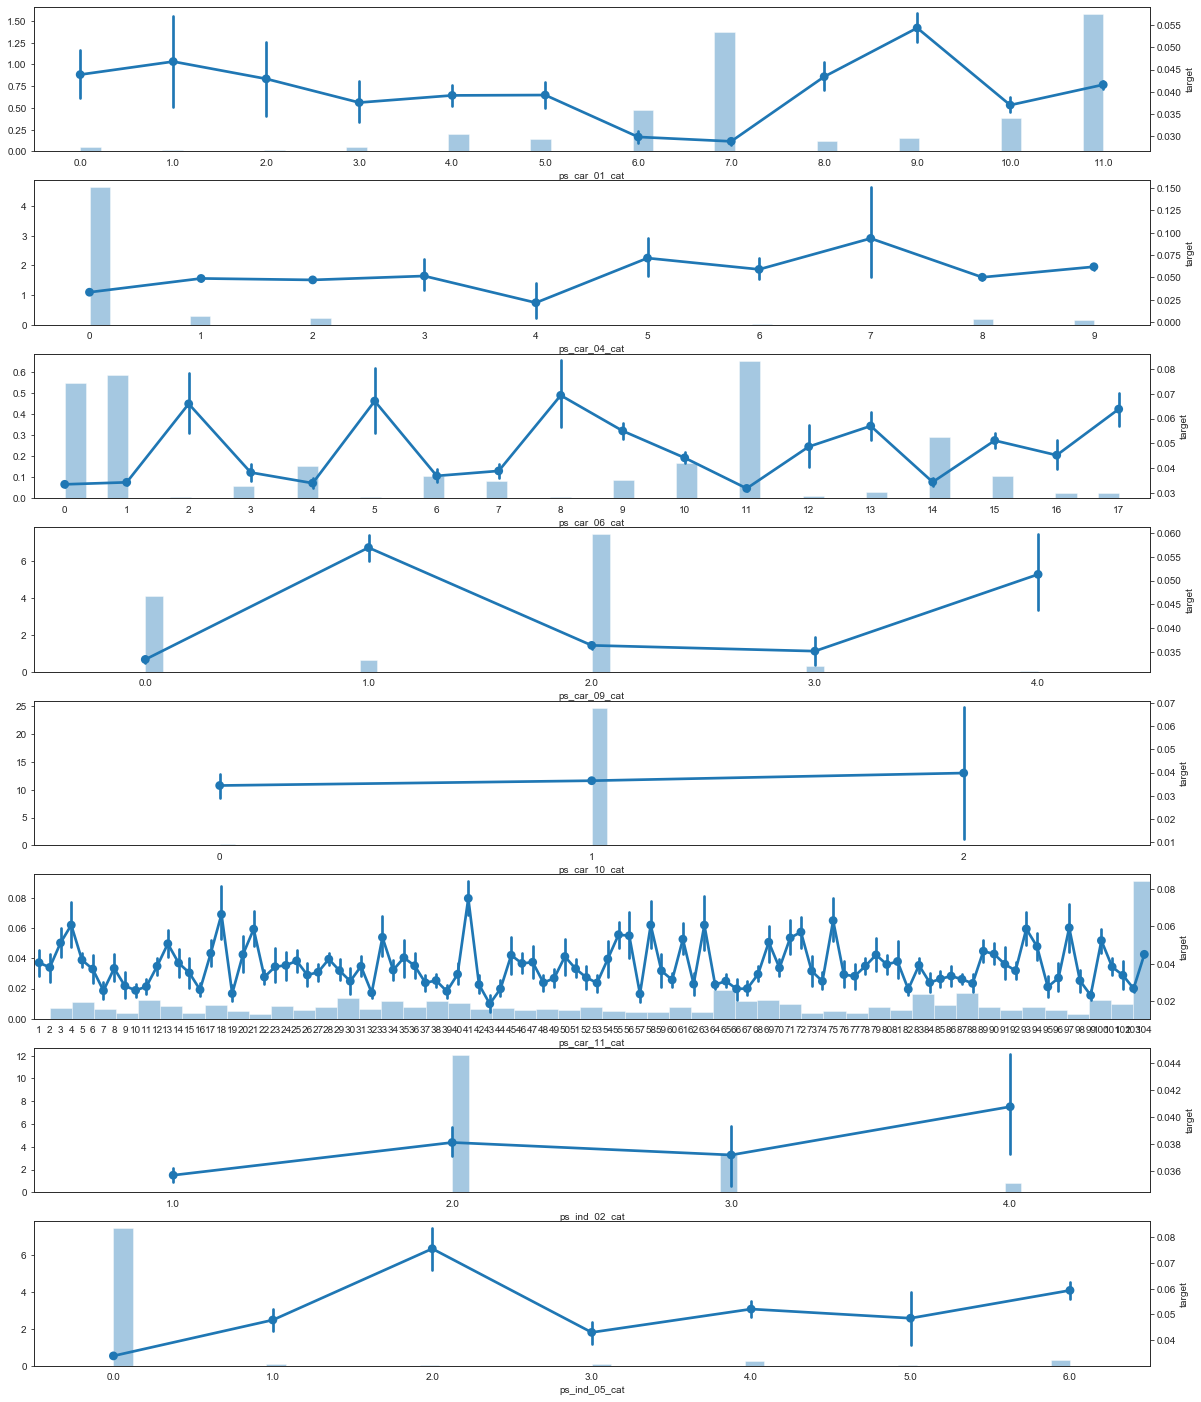

In [36]:
fig, axs = plt.subplots(8, 1, figsize=(20, 25))

for ax, cat_feat in zip(axs, categorical_features):
     ax2 = ax.twinx()
     sns.distplot(df[cat_feat].dropna(), kde=False, norm_hist=True, ax = ax)
     sns.pointplot(x=cat_feat, y='target', data=df.iloc[:df_train.shape[0]], ax=ax2)
    
plt.show()

In [37]:
df[df == -1] = np.nan

# Binary and Numeric Features

no_of_features = sum(df[binary_numeric].corr()
                     .target
                     .abs()
                     .drop('target')
                     .sort_values(ascending=False) > 0.005)
no_of_features

23

In [38]:
bin_num_features = (df[binary_numeric].corr()
                    .target
                    .abs()
                    .drop('target')
                    .sort_values(ascending = False))[:no_of_features].index.tolist()

In [39]:
cat_features = [feature for feature in df.columns.tolist() 
                if (feature not in bin_num_features) and (feature.endswith('cat'))]

In [40]:
df_fs1 = df[bin_num_features + cat_features]

df_fs1['target'] = df.target
bin_num_feat = [column for column in df_fs1.columns 
                if column not in cat_features]

[]

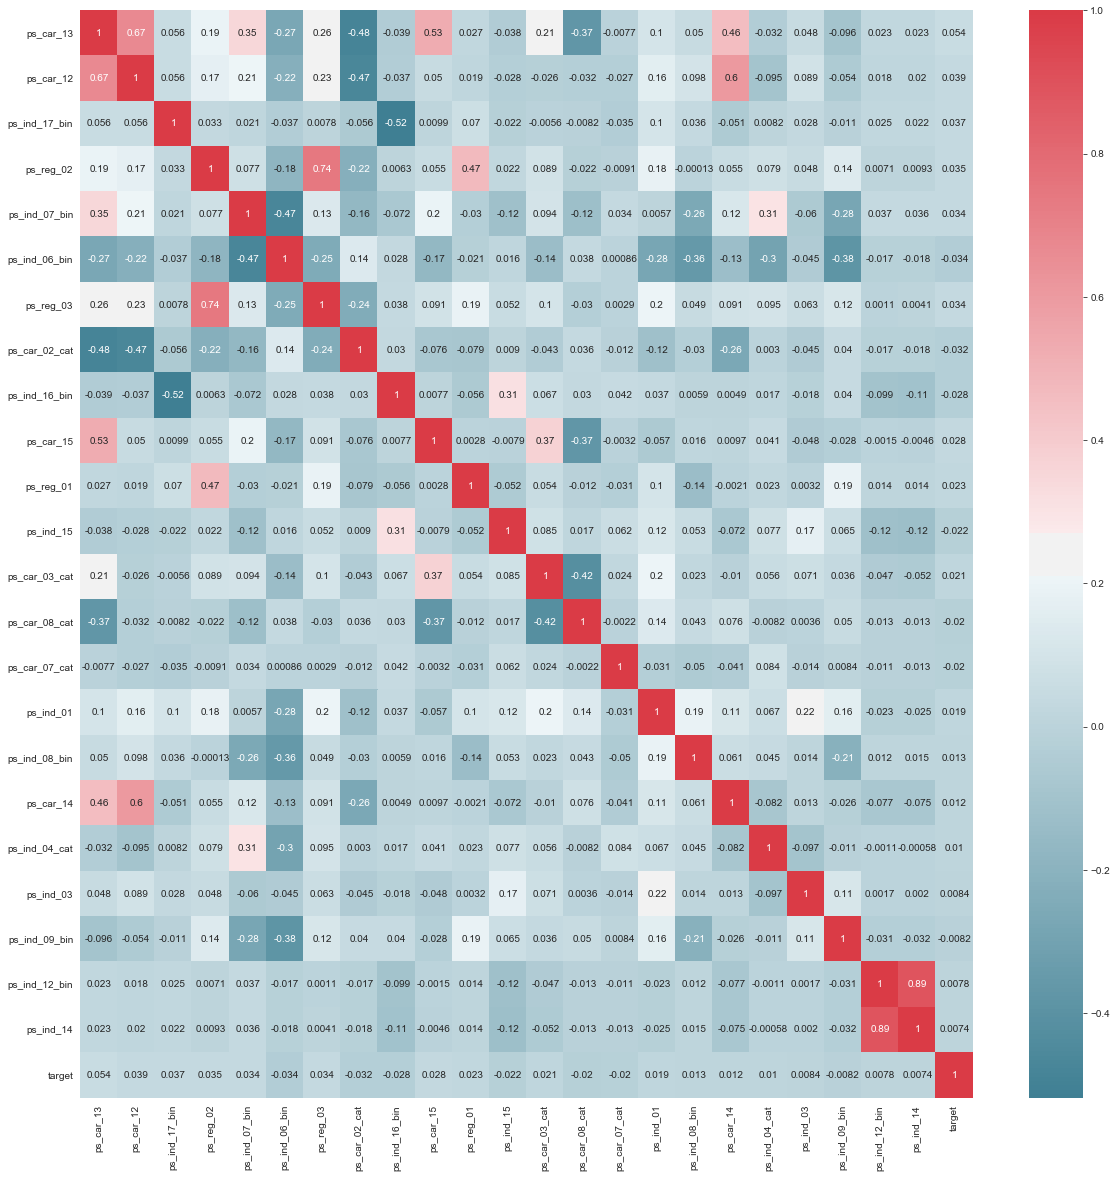

In [41]:
sns.set_style('white')
cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 20))
sns.heatmap(df_fs1[bin_num_feat].iloc[:df_train.shape[0]].corr(), annot = True, cmap = cmap)
plt.plot()

In [42]:
del df_fs1['ps_ind_14']

In [43]:
np.sum(df_fs1.isnull())

ps_car_13              0
ps_car_12              1
ps_ind_17_bin          0
ps_reg_02              0
ps_ind_07_bin          0
ps_ind_06_bin          0
ps_reg_03         269456
ps_car_02_cat         10
ps_ind_16_bin          0
ps_car_15              0
ps_reg_01              0
ps_ind_15              0
ps_car_03_cat    1028142
ps_car_08_cat          0
ps_car_07_cat      28820
ps_ind_01              0
ps_ind_08_bin          0
ps_car_14         106425
ps_ind_04_cat        228
ps_ind_03              0
ps_ind_09_bin          0
ps_ind_12_bin          0
ps_car_01_cat        267
ps_car_04_cat          0
ps_car_05_cat     666910
ps_car_06_cat          0
ps_car_09_cat       1446
ps_car_10_cat          0
ps_car_11_cat          0
ps_ind_02_cat        523
ps_ind_05_cat      14519
target            892816
dtype: int64

In [44]:
[feat for feat in df_fs1.columns.tolist() 
 if np.sum(pd.isnull(df_fs1[feat])) > (df_fs1.shape[0])*0.20]

['ps_car_03_cat', 'ps_car_05_cat', 'target']

In [45]:
del df_fs1['ps_car_03_cat']
del df_fs1['ps_car_05_cat']

In [46]:
[feat for feat in df_fs1.columns.tolist() 
 if feat.endswith('cat') and ((np.sum(pd.isnull(df_fs1[feat]))) > 0)]

['ps_car_02_cat',
 'ps_car_07_cat',
 'ps_ind_04_cat',
 'ps_car_01_cat',
 'ps_car_09_cat',
 'ps_ind_02_cat',
 'ps_ind_05_cat']

In [47]:
df_fs1.ps_car_02_cat.fillna('-1', inplace = True)
df_fs1.ps_car_07_cat.fillna('-1', inplace = True)
df_fs1.ps_ind_04_cat.fillna('-1', inplace = True)
df_fs1.ps_car_01_cat.fillna('-1', inplace = True)
df_fs1.ps_car_09_cat.fillna('-1', inplace = True)
df_fs1.ps_ind_02_cat.fillna('-1', inplace = True)
df_fs1.ps_ind_05_cat.fillna('-1', inplace = True)

In [48]:
[feat for feat in df_fs1.columns.tolist() 
 if np.sum(pd.isnull(df_fs1[feat])) > 0]

['ps_car_12', 'ps_reg_03', 'ps_car_14', 'target']

In [49]:
df_fs1['ps_car_12'].fillna(df_fs1['ps_car_12'].median(), inplace = True)
df_fs1['ps_reg_03'].fillna(df_fs1['ps_reg_03'].median(), inplace = True)
df_fs1['ps_car_14'].fillna(df_fs1['ps_car_14'].median(), inplace = True)

In [50]:
np.sum(df_fs1.isnull())

ps_car_13             0
ps_car_12             0
ps_ind_17_bin         0
ps_reg_02             0
ps_ind_07_bin         0
ps_ind_06_bin         0
ps_reg_03             0
ps_car_02_cat         0
ps_ind_16_bin         0
ps_car_15             0
ps_reg_01             0
ps_ind_15             0
ps_car_08_cat         0
ps_car_07_cat         0
ps_ind_01             0
ps_ind_08_bin         0
ps_car_14             0
ps_ind_04_cat         0
ps_ind_03             0
ps_ind_09_bin         0
ps_ind_12_bin         0
ps_car_01_cat         0
ps_car_04_cat         0
ps_car_06_cat         0
ps_car_09_cat         0
ps_car_10_cat         0
ps_car_11_cat         0
ps_ind_02_cat         0
ps_ind_05_cat         0
target           892816
dtype: int64

In [51]:
features = np.array([feature for feature in df_fs1.columns.tolist() 
                     if feature != 'target'])

In [52]:
random_state = 1212

In [53]:
idx = df_fs1[df_fs1.target.notnull()].index.tolist()

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(50, random_state = random_state)
clf.fit(df_fs1[features].loc[idx], df_fs1.target.loc[idx])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1212,
                       verbose=0, warm_start=False)

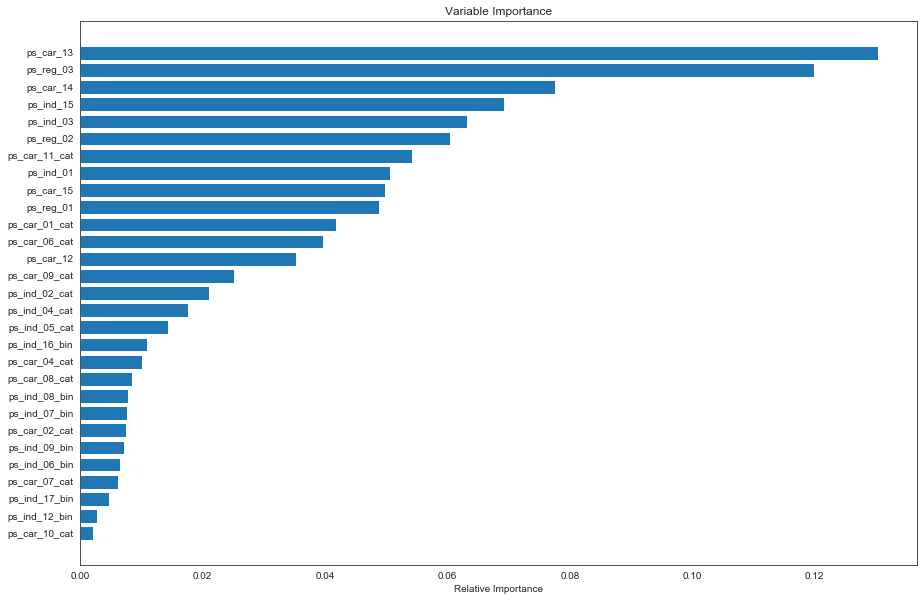

In [54]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(15, 10))

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

plt.show()

In [55]:
combined = df_fs1[features]
combined['target'] = df_train.set_index('id').target

Text(0.5, 1.0, 'ps_ind_15 Distribution')

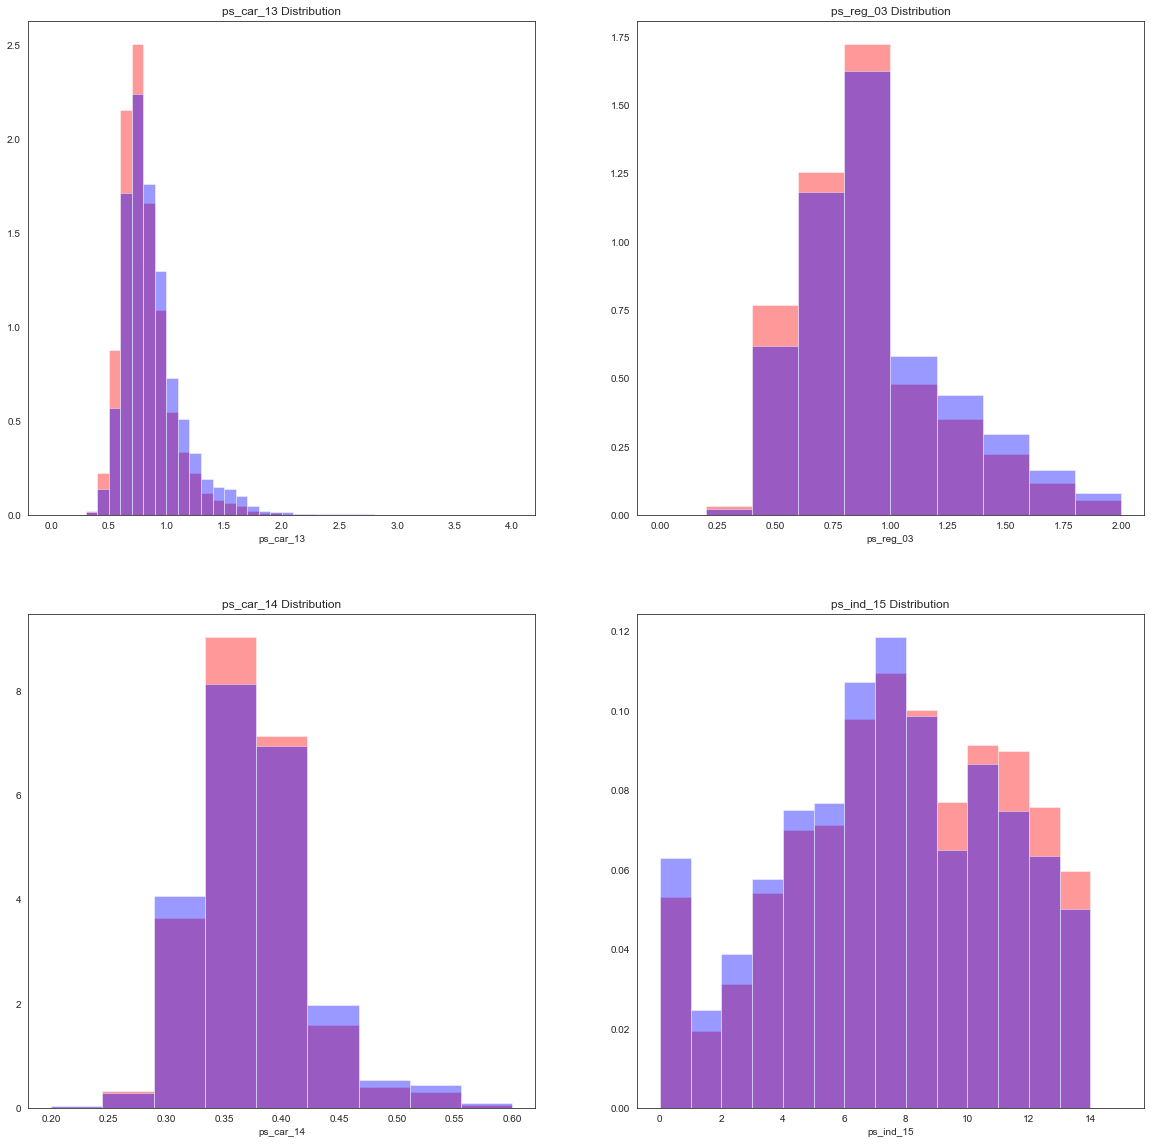

In [56]:
plt.figure(figsize=(20,20))

plt.subplot(221)
sns.distplot(combined[combined.target == 0].ps_car_13.dropna(),
             bins = np.linspace(0, 4, 41), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_car_13.dropna(),
             bins = np.linspace(0, 4, 41), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_car_13 Distribution')

plt.subplot(222)
sns.distplot(combined[combined.target == 0].ps_reg_03,
             bins = np.linspace(0, 2, 11), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_reg_03,
             bins = np.linspace(0, 2, 11), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_reg_03 Distribution')

plt.subplot(223)
sns.distplot(combined[combined.target == 0].ps_car_14,
             bins = np.linspace(0.2, 0.6, 10), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_car_14, 
             bins = np.linspace(0.2, 0.6, 10), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_car_14 Distribution')

plt.subplot(224)
sns.distplot(combined[combined.target == 0].ps_ind_15.dropna(),
             bins = np.linspace(0, 15, 16), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_ind_15.dropna(),
             bins = np.linspace(0, 15, 16), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_ind_15 Distribution')

Text(0.5, 1.0, 'ps_ind_01 Distribution')

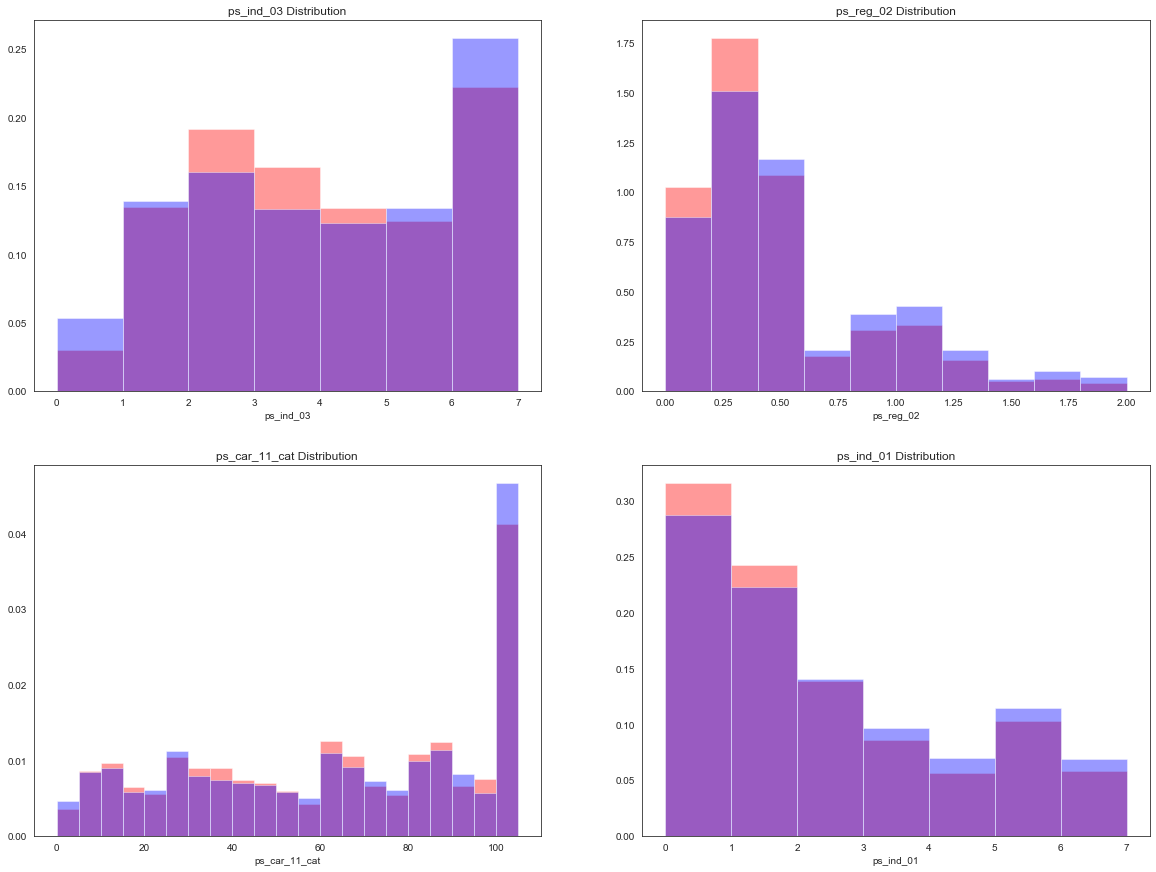

In [57]:
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.distplot(combined[combined.target == 0].ps_ind_03.dropna(),
             bins = range(0, 8, 1), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_ind_03.dropna(),
             bins = range(0, 8, 1), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_ind_03 Distribution')

plt.subplot(222)
sns.distplot(combined[combined.target == 0].ps_reg_02.dropna(),
             bins = np.linspace(0, 2, 11), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_reg_02.dropna(),
             bins = np.linspace(0, 2, 11), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_reg_02 Distribution')

plt.subplot(223)
sns.distplot(combined[combined.target == 0].ps_car_11_cat.dropna(), 
             bins = range(0, 110, 5), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_car_11_cat.dropna(), 
             bins = range(0, 110, 5), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_car_11_cat Distribution')

plt.subplot(224)
sns.distplot(combined[combined.target == 0].ps_ind_01.dropna(),
             bins = range(0, 8, 1), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_ind_01.dropna(),
             bins = range(0, 8, 1), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_ind_01 Distribution')

Text(0.5, 1.0, 'ps_car_06_cat Distribution')

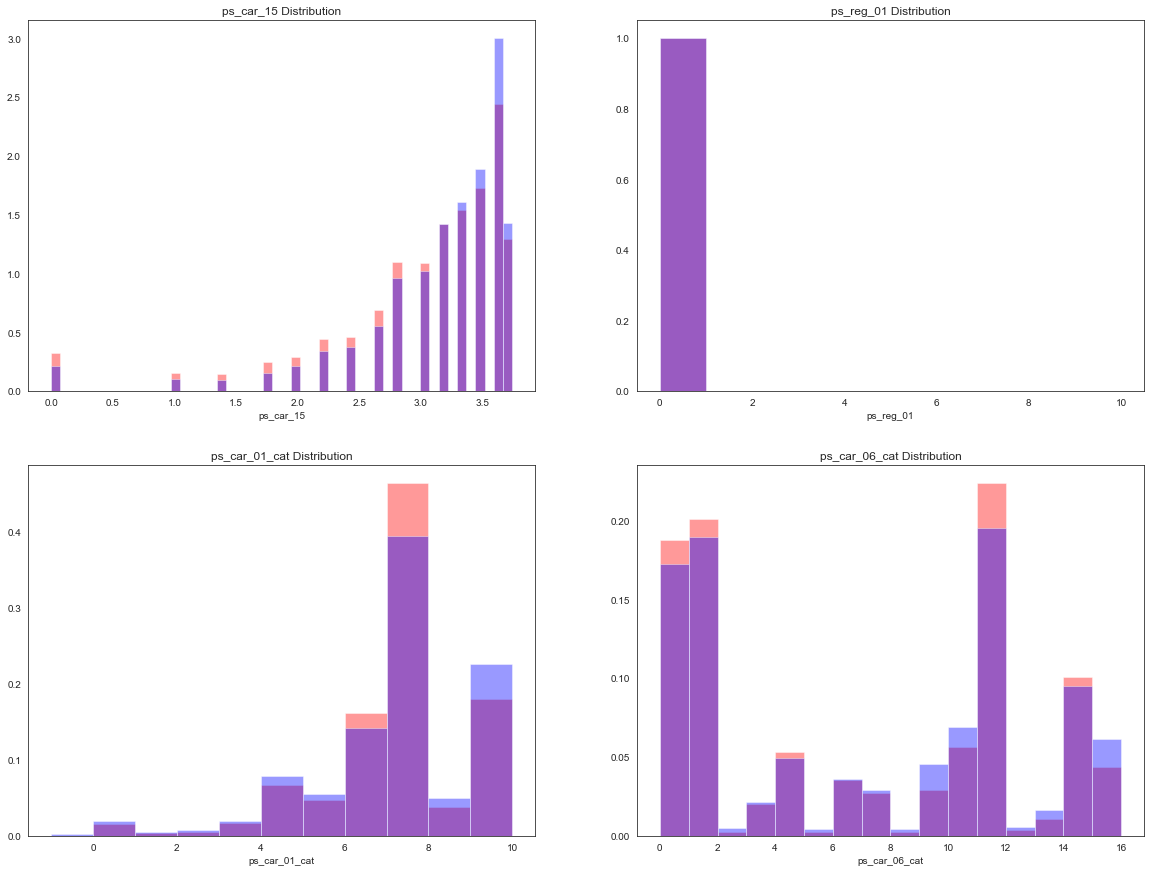

In [74]:
plt.figure(figsize=(20,15))

plt.subplot(221)
sns.distplot(combined[combined.target == 0].ps_car_15.dropna(), 
             kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_car_15.dropna(), 
             kde = False, norm_hist = True, color = 'blue')
plt.title('ps_car_15 Distribution')

plt.subplot(222)
sns.distplot(combined[combined.target == 0].ps_reg_01.dropna(),
             bins = range(0, 11, 1), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_reg_01.dropna(),
             bins = range(0, 11, 1), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_reg_01 Distribution')

plt.subplot(223)
sns.distplot(combined[combined.target == 0].ps_car_01_cat.dropna(), 
             bins = range(-1, 11, 1), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_car_01_cat.dropna(), 
             bins = range(-1, 11, 1), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_car_01_cat Distribution')

plt.subplot(224)
sns.distplot(combined[combined.target == 0].ps_car_06_cat.dropna(), 
             bins = range(0, 17, 1), kde = False, norm_hist = True, color = 'red')
sns.distplot(combined[combined.target == 1].ps_car_06_cat.dropna(), 
             bins = range(0, 17, 1), kde = False, norm_hist = True, color = 'blue')
plt.title('ps_car_06_cat Distribution')

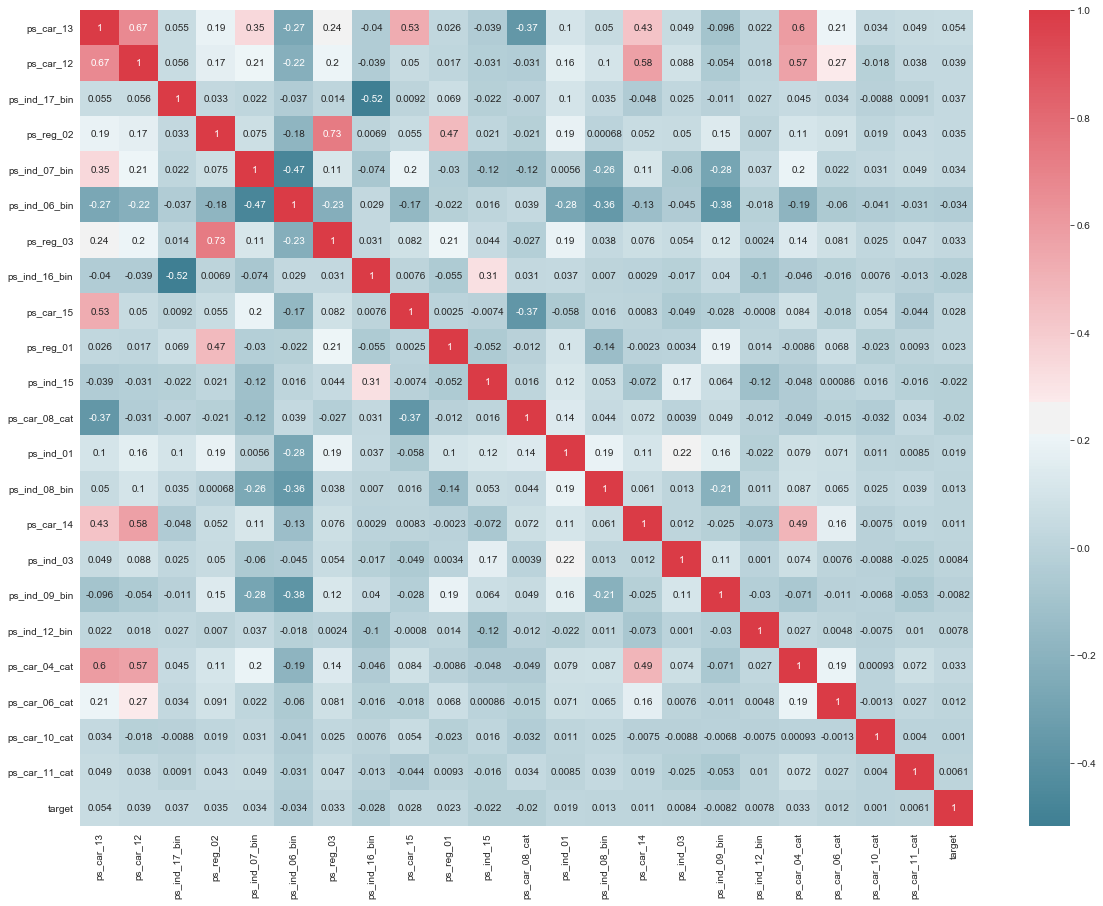

In [75]:
combined['target'] = df_train.set_index('id').target

plt.figure(figsize=(20, 15))
sns.heatmap(combined.corr(), annot = True, cmap = cmap)
plt.show()

In [76]:
ind_var = [feature for feature in combined.columns[sorted_idx][-10:] 
           if feature != 'target']
ind_var.reverse()

In [77]:
from sklearn.preprocessing import PolynomialFeatures

train = combined[pd.notnull(combined.target)][ind_var].reset_index(drop=True)

poly = PolynomialFeatures(interaction_only = True, include_bias = False)

train_interaction = pd.DataFrame(poly.fit_transform(train))
train_interaction['target'] = df_train.target

In [78]:
features = np.array([feature for feature in train_interaction.columns.tolist()
                     if feature != 'target'])

clf = RandomForestClassifier(50, random_state = random_state)
clf.fit(train_interaction.iloc[:df_train.shape[0]][features], 
        train_interaction.iloc[:df_train.shape[0]]['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1212,
                       verbose=0, warm_start=False)

<Figure size 1080x720 with 0 Axes>

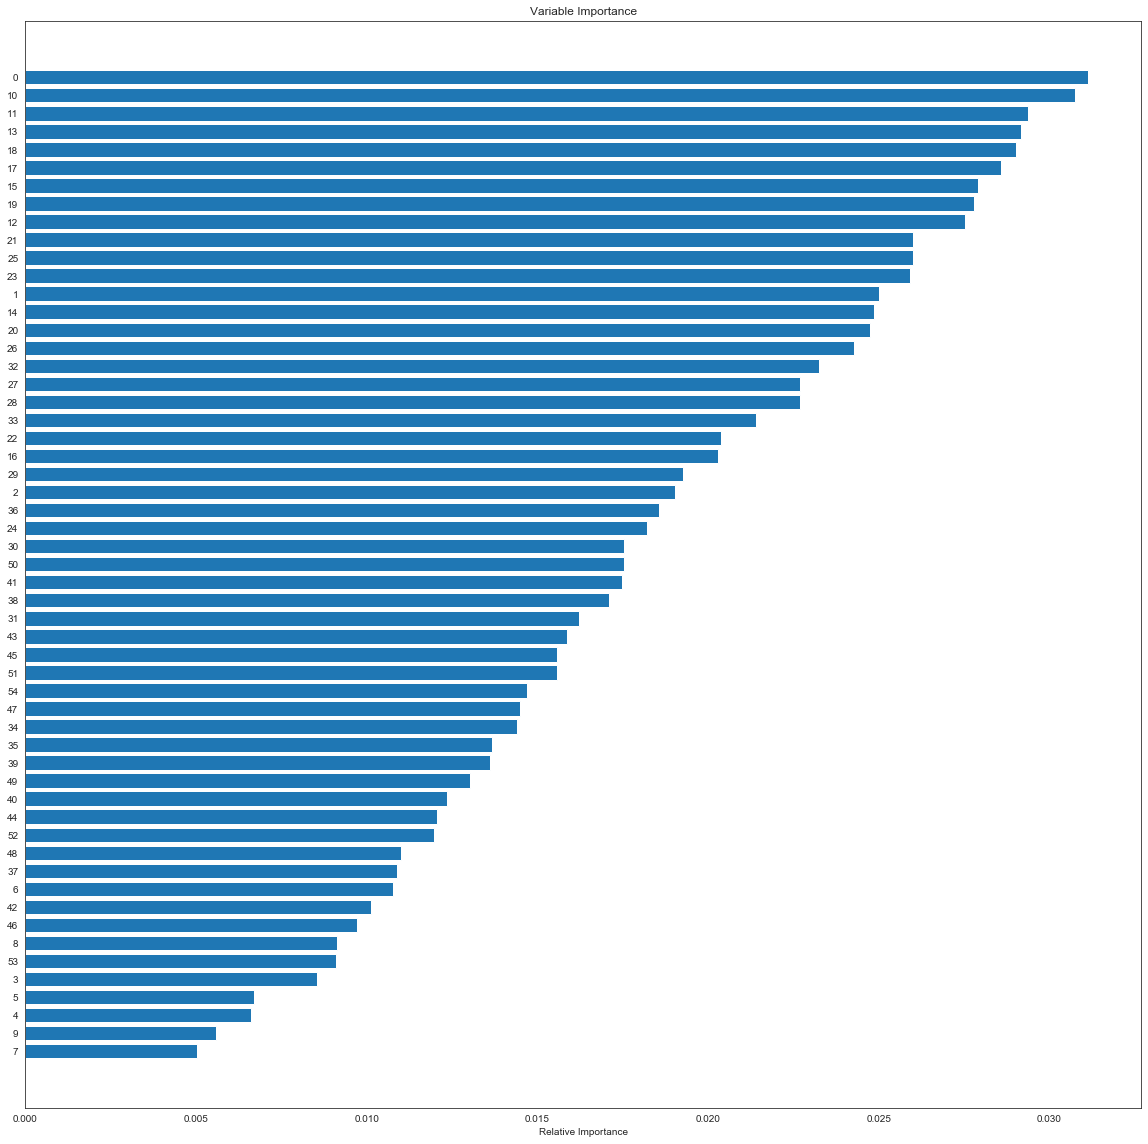

In [79]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(15, 10))

plt.figure(figsize=(20, 20))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

plt.show()

In [80]:
[feat for feat in ind_var]

['ps_car_13',
 'ps_reg_03',
 'ps_car_14',
 'ps_ind_15',
 'ps_ind_03',
 'ps_reg_02',
 'ps_car_11_cat',
 'ps_ind_01',
 'ps_car_15',
 'ps_reg_01']

In [81]:
combined['feature10'] = combined['ps_car_13'] * combined['ps_reg_03']

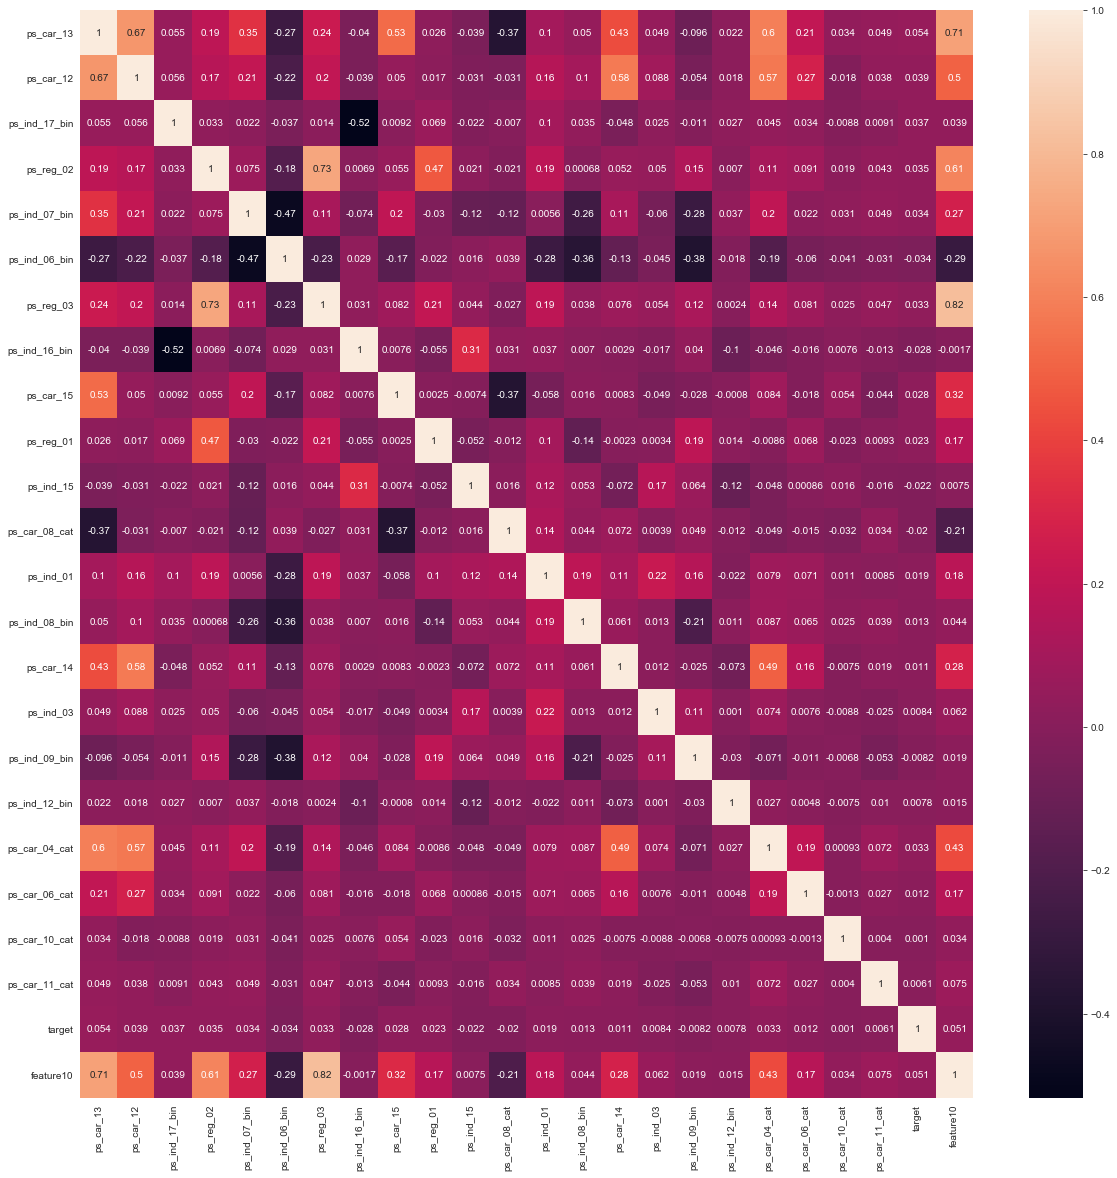

In [82]:
combined['target'] = df_train.set_index('id').target

plt.figure(figsize=(20, 20))
sns.heatmap(combined.corr(), annot = True)
plt.show()

In [83]:
features = np.array([feature for feature in combined.columns.tolist()
                     if feature != 'target'])

clf = RandomForestClassifier(50, random_state = random_state)
clf.fit(combined[pd.notnull(combined.target)][features], 
        combined[pd.notnull(combined.target)].target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=1212,
                       verbose=0, warm_start=False)

<Figure size 1080x720 with 0 Axes>

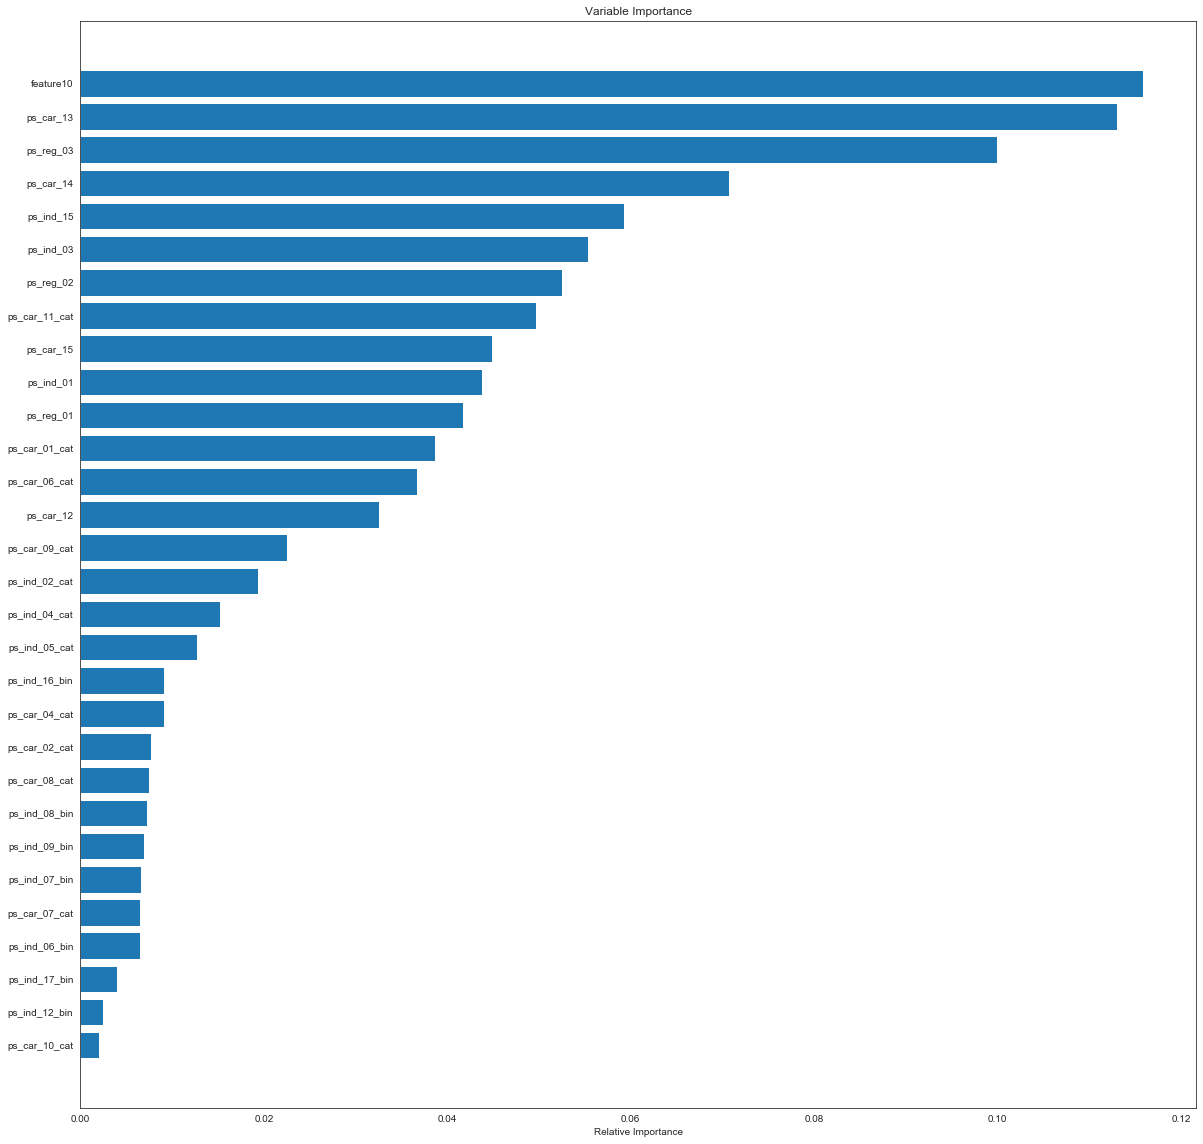

In [84]:
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

plt.figure(figsize=(15, 10))

plt.figure(figsize=(20, 20))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")

plt.show()

In [85]:
del combined['target']

In [86]:
X_train = combined.reset_index(drop = True).iloc[:df_train.shape[0], ]
X_test = combined.reset_index(drop = True).iloc[df_train.shape[0]:, ]

In [87]:
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [88]:
features = X_train.columns.tolist

X = X_train.values; test = X_test.values

y = df_train.set_index('id').target.values

In [89]:
params = {
    'objective': 'binary:logistic',
    'min_child_weight': 12.0,
    'max_depth': 5,
    'colsample_bytree': 0.5,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.8,
    'max_delta_step': 1.5
}

In [90]:
import xgboost as xgb
from sklearn.model_selection import StratifiedKFold

submission = pd.DataFrame()
submission['id'] = df_test['id'].values
submission['target'] = 0

nrounds=1000
folds = 5
skf = StratifiedKFold(n_splits=folds, random_state=random_state)

for i, (train_index, test_index) in enumerate(skf.split(X, y)):
    int(i+1)
    
    X_subtrain, X_subtest = X[train_index], X[test_index]
    y_train, y_valid = y[train_index], y[test_index]
    
    d_subtrain = xgb.DMatrix(X_subtrain, y_train) 
    d_subtest = xgb.DMatrix(X_subtest, y_valid) 
    d_test = xgb.DMatrix(test)
    
    watchlist = [(d_subtrain, 'subtrain'), (d_subtest, 'subtest')]
    
    mdl = xgb.train(params, d_subtrain, nrounds, watchlist, early_stopping_rounds=80, 
                    feval=gini_xgb, maximize=True, verbose_eval=50)
    
    # Predict test set based on the best_ntree_limit
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    
    # Take the average of the prediction via 5 folds to predict for the test set
    submission['target'] += p_test/folds

[0]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.00029	subtest-gini:0.00962
Multiple eval metrics have been passed: 'subtest-gini' will be used for early stopping.

Will train until subtest-gini hasn't improved in 80 rounds.
[50]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.26356	subtest-gini:0.25331
[100]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.27193	subtest-gini:0.25643
[150]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.28650	subtest-gini:0.26338
[200]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.30089	subtest-gini:0.27015
[250]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.31509	subtest-gini:0.27595
[300]	subtrain-error:0.03645	subtest-error:0.03645	subtrain-gini:0.32624	subtest-gini:0.27933
[350]	subtrain-error:0.03644	subtest-error:0.03645	subtrain-gini:0.33491	subtest-gini:0.28077
[400]	subtrain-error:0.03643	subtest-error:0.03645	subtrain-gini:0.34336	subtest-gini:0.28194
[450]	su

In [ ]:
submission.to_csv('C:/Users/puj83/OneDrive/Portfolio/Porto_Seguro_Claims/submission.csv', index=False)